# Project Objectives:
- In this project I aim to predict sales using Linear Regression, Decison Tree, and Random Forest Regressor
- Author: Carlos Caballero - Data Scientist
- Dataset: Sample Superstore from Tableau Community
- Models: Linear Regression, Decison Tree, and Random Forest
- Method: Regression using 8 neurons in the hidden layer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn

In [2]:
# Read in data
store = pd.read_excel('superstore.xls')
store.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2011-103800,2013-01-03,2013-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2011-112326,2013-01-04,2013-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2011-141817,2013-01-05,2013-01-12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [3]:
# Check out number of columns
store.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [4]:
# See shape of the data
store.shape

(9994, 21)

In [5]:
# See how clean the data is
store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Check data types
store.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
# Obtain turnaround time in days from order date to ship date
store['Turn'] = store['Ship Date'] - store['Order Date']

In [8]:
store['Turn'].head()

0   4 days
1   4 days
2   4 days
3   4 days
4   7 days
Name: Turn, dtype: timedelta64[ns]

In [9]:
# Turn timedelta into string
store['Turn'] = store['Turn'].astype(str)
store['Turn'].head()

0    4 days 00:00:00.000000000
1    4 days 00:00:00.000000000
2    4 days 00:00:00.000000000
3    4 days 00:00:00.000000000
4    7 days 00:00:00.000000000
Name: Turn, dtype: object

In [10]:
# Leave only the number of days
store['Turn'] = store['Turn'].str.split("").str[1]
store['Turn'].head()

0    4
1    4
2    4
3    4
4    7
Name: Turn, dtype: object

In [11]:
# Convert Turn feature into integer
store['Turn']= store['Turn'].astype(int)

In [12]:
# Convert Postal Code feature into string
store['Postal Code'] = store['Postal Code'].astype(str)

In [13]:
# I don't need this feature
del store['Row ID']

## Explore data

In [14]:
# Descriptive stats
store.describe()

,Sales,Quantity,Discount,Profit,Turn
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,3.958175
std,623.245101,2.225110,0.206452,234.260108,1.747567
min,0.444000,1.000000,0.000000,-6599.978000,0.000000
25%,17.280000,2.000000,0.000000,1.728750,3.000000
50%,54.490000,3.000000,0.200000,8.666500,4.000000
75%,209.940000,5.000000,0.200000,29.364000,5.000000
max,22638.480000,14.000000,0.800000,8399.976000,7.000000


In [15]:
store.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID',
       'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Turn'],
      dtype='object')

In [16]:
#Examine correlation between the features
corr_matrix = store.corr()
corr_matrix['Sales'].sort_values(ascending=False)

Sales       1.000000
Profit      0.479064
Quantity    0.200795
Turn       -0.007354
Discount   -0.028190
Name: Sales, dtype: float64

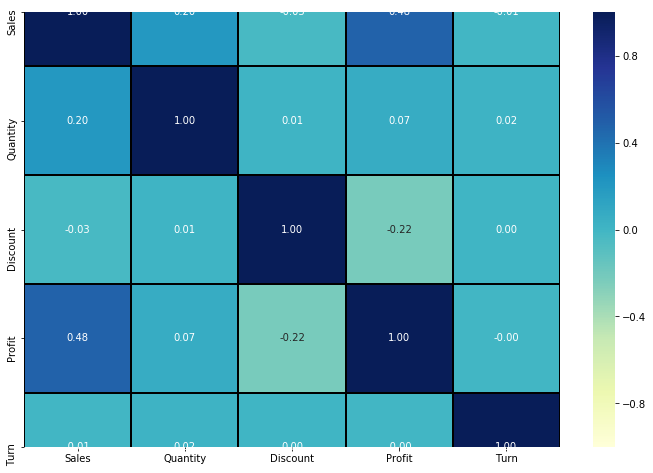

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(store.corr(), vmin=-1, vmax=1, center = 0, linewidths=1.0, cmap='YlGnBu', linecolor = 'black', annot=True, fmt=".2f")

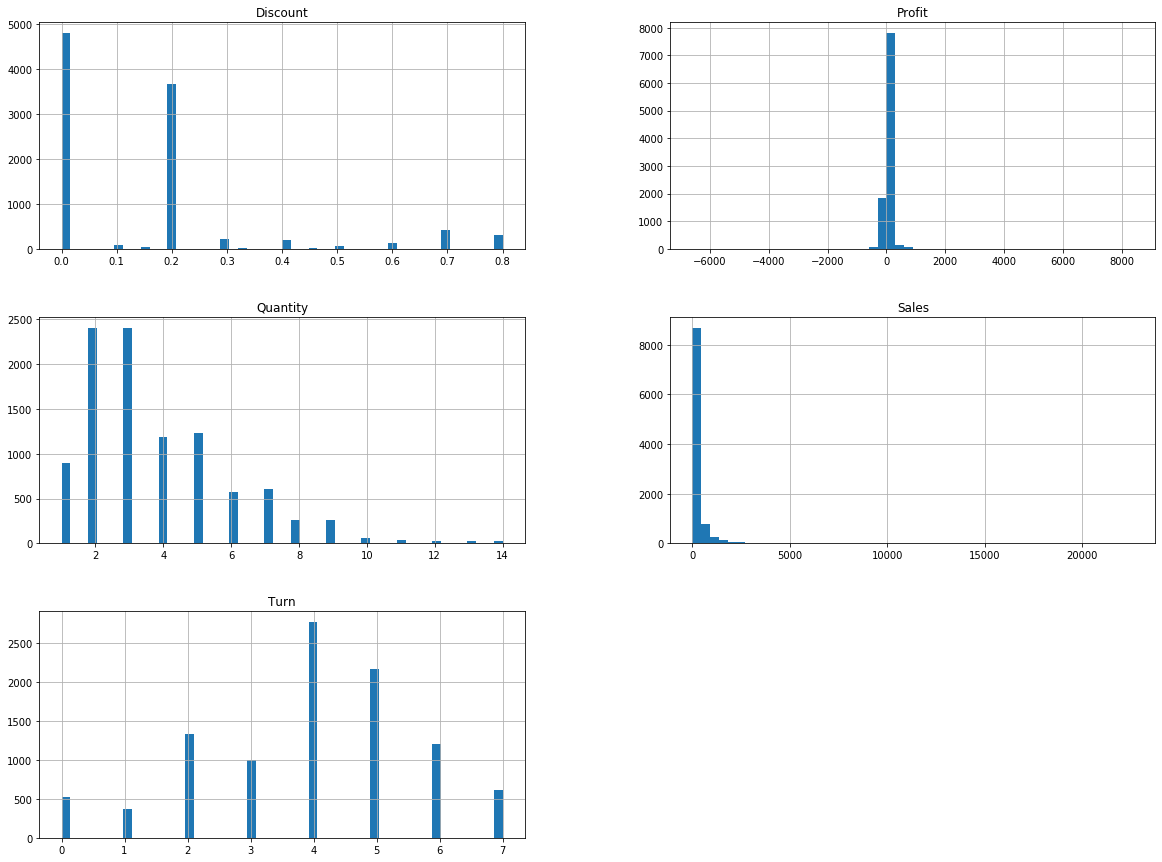

In [18]:
store.hist(bins=50, figsize=(20,15))
plt.show()

In [19]:
store['Ship Mode'].value_counts(normalize=True)

Standard Class    0.597158
Second Class      0.194617
First Class       0.153892
Same Day          0.054333
Name: Ship Mode, dtype: float64

In [20]:
store['Segment'].value_counts(normalize=True)

Consumer       0.519412
Corporate      0.302181
Home Office    0.178407
Name: Segment, dtype: float64

In [21]:
store['State'].value_counts(normalize=True).head(10)

California        0.200220
New York          0.112868
Texas             0.098559
Pennsylvania      0.058735
Washington        0.050630
Illinois          0.049230
Ohio              0.046928
Florida           0.038323
Michigan          0.025515
North Carolina    0.024915
Name: State, dtype: float64

In [22]:
store['Region'].value_counts(normalize=True)

West       0.320492
East       0.284971
Central    0.232439
South      0.162097
Name: Region, dtype: float64

In [23]:
store['Category'].value_counts(normalize=True)

Office Supplies    0.602962
Furniture          0.212227
Technology         0.184811
Name: Category, dtype: float64

In [24]:
store['Sub-Category'].value_counts(normalize=True).head(5)

Binders        0.152391
Paper          0.137082
Furnishings    0.095757
Phones         0.088953
Storage        0.084651
Name: Sub-Category, dtype: float64

## Pre-Process for Modeling

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [130]:
X = store[['Segment','Category','Profit','Quantity']]
y = store['Sales'].values

In [131]:
X = pd.get_dummies(X)

In [132]:
X.head()

,Profit,Quantity,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,5.5512,2,1,0,0,0,1,0
1,4.2717,3,0,0,1,0,1,0
2,-64.7748,3,0,0,1,0,1,0
3,-5.4870,2,0,0,1,0,1,0
4,4.8840,3,1,0,0,0,1,0


In [133]:
# Normalize predictors
X_norm = (X - X.mean()) / X.std()
X_norm.head()

,Profit,Quantity,Segment_Consumer,Segment_Corporate,Segment_Home Office,Category_Furniture,Category_Office Supplies,Category_Technology
0,-0.098633,-0.804263,0.961854,-0.658023,-0.465968,-0.519013,0.811427,-0.476116
1,-0.104095,-0.354847,-1.039555,-0.658023,2.145856,-0.519013,0.811427,-0.476116
2,-0.398837,-0.354847,-1.039555,-0.658023,2.145856,-0.519013,0.811427,-0.476116
3,-0.145752,-0.804263,-1.039555,-0.658023,2.145856,-0.519013,0.811427,-0.476116
4,-0.101481,-0.354847,0.961854,-0.658023,-0.465968,-0.519013,0.811427,-0.476116


In [134]:
y[:5]

array([ 16.448,  11.784, 272.736,   3.54 ,  19.536])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.30, random_state=42)

In [136]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (6995, 8)
y_train shape:  (6995,)
X_test shape:  (2999, 8)
y_test shape:  (2999,)


In [137]:
n_cols = X_train.shape[1]
n_cols

8

## Fit Linear Model

In [138]:
# Fit Model
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 2.76675214e+02  1.06756599e+02  4.38866276e+13  4.03361873e+13
  3.36297857e+13 -4.02063599e+15 -4.81121418e+15 -3.81668749e+15]


In [139]:
# Make predictions
y_hat= regr.predict(X_test)

## Evaluate Linear Model

In [140]:
# Examine model performance with test dataset

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [141]:
# Explained Variance Score
print('Variance score: %.4f' % explained_variance_score(y_test,y_hat))

Variance score: 0.2692


In [142]:
print('MAE: %.4f' % mean_absolute_error(y_test,y_hat))

MAE: 205.2608


In [143]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,y_hat))

MSE: 388680.1389


In [144]:
# Root Mean Squared Error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_hat))
print('RMSE: %.4f' % rmse)

RMSE: 623.4422


In [145]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,y_hat))

R2: 0.2692


## Fit Decision Tree

In [146]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [147]:
# Predictions
tree_pred = tree_reg.predict(X_test)

## Evaluate Decision Tree

In [148]:
print('MAE: %.4f' % mean_absolute_error(y_test,tree_pred))

MAE: 133.4288


In [149]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,tree_pred))

MSE: 284105.0585


In [150]:
# Root Mean Squared Error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, tree_pred))
print('RMSE: %.4f' % rmse)

RMSE: 533.0151


In [151]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,tree_pred))

R2: 0.4658


## Fit Random Forest 

In [164]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [165]:
# See feature importances
model_features = X_norm.columns
feature_importances = pd.DataFrame(forest_reg.feature_importances_,
                                   index = model_features,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                          importance
Profit                      0.870620
Quantity                    0.056085
Category_Office Supplies    0.035614
Segment_Consumer            0.010467
Category_Technology         0.010279
Segment_Corporate           0.006968
Category_Furniture          0.005099
Segment_Home Office         0.004868


In [166]:
# Make predicitions
forest_pred = forest_reg.predict(X_test)

## Evaluate Random Forest 

In [167]:
print('MAE: %.4f' % mean_absolute_error(y_test,forest_pred))

MAE: 115.8778


In [168]:
# Mean Squared Error
print('MSE: %.4f' % mean_squared_error(y_test,forest_pred))

MSE: 214995.2403


In [169]:
# Root Mean Squared Error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, forest_pred))
print('RMSE: %.4f' % rmse)

RMSE: 463.6758


In [170]:
# R2 Score
print('R2: %.4f' % r2_score(y_test,forest_pred))

R2: 0.5958


## Fine-tune Random Forest Model

In [159]:
from sklearn.model_selection import GridSearchCV

In [160]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features':[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],


In [161]:
# Get the best combination of parameters
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [162]:
# Get the best estimator directly
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [163]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

388.9295729356971 {'max_features': 2, 'n_estimators': 3}
338.8784485189029 {'max_features': 2, 'n_estimators': 10}
341.49615496222816 {'max_features': 2, 'n_estimators': 30}
343.91123839696536 {'max_features': 4, 'n_estimators': 3}
328.3061370951865 {'max_features': 4, 'n_estimators': 10}
310.0716389972365 {'max_features': 4, 'n_estimators': 30}
331.94888151651037 {'max_features': 6, 'n_estimators': 3}
316.9006781050669 {'max_features': 6, 'n_estimators': 10}
302.56000563123365 {'max_features': 6, 'n_estimators': 30}
353.694245361296 {'max_features': 8, 'n_estimators': 3}
314.6462349046756 {'max_features': 8, 'n_estimators': 10}
312.8389822731342 {'max_features': 8, 'n_estimators': 30}
398.38139965994446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
368.30721416290595 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
350.78177504428544 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
346.8956368698438 {'bootstrap': False, 'max_features': 3, 'n_estimator

### go back to Random Forest model and update parameters

## Conclusion:
### Model result:
- Random Forest and decision tree performed similarly as best performing models; however, decided to go with Random Forest regressor instead because of the complexity of problem. Updated model features after analyzing feature importances.

- After hyper-parameter tuning using gridsearch, RandomForest improved from R2 score of 51% to 60%

- Additionally, the RMSE decreased from 465.04

- The best parameters for the Random Forest model are:
    - MSE: 214995.2403 {'max_features': 6, 'n_estimators': 30}